# 1) LOADING MODULES AND DATASETS

In [1]:
##Loading modules 
import warnings
warnings.filterwarnings('ignore')

import numpy as np ## array processing
import pandas as pd ## dataframe processing
import math
import re

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder ##encoding
from sklearn.compose import ColumnTransformer, make_column_transformer ##ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline ## Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV ##cross validation
from sklearn.impute import SimpleImputer ## Imputation
from sklearn.linear_model import LogisticRegression ##ML Algorithm LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,classification_report ##Model Evaluation
from sklearn.ensemble import RandomForestClassifier ##Ensemble Learning Bagging
from scipy.sparse import csr_matrix
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier ##KNN 
from sklearn.naive_bayes import MultinomialNB ## NaiveBayes
from sklearn import metrics

import eli5 ##names from transformer
import xgboost as xgbs ## Boosting -Xgboost
import seaborn as sns ##Visualization
import matplotlib.pyplot as plt ## Visualization
import plotly.express as px ##Visualiztion
from yellowbrick import classifier, features, regressor ## ML Visualization
import pickle
import re

In [2]:
data_train = pd.read_csv(r'/Users/Humza Ali/OneDrive/Documents/Data/Practise/Credit/Credit_train.csv') ## Loading Train datasets   

In [3]:
data_test = pd.read_csv(r'/Users/Humza Ali/OneDrive/Documents/Data/Practise/Credit/Credit_test.csv') ## Loading Test datasets 

# 2) BIVARIATE ANALYSIS FEATURE ENGINEERING AND EDA

In [4]:
data_train.head() ## Checking first 5 row of train datasets

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
data_test.head() ## Checking first 5 row of test datasets

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
data_train.shape ## Checking No of rows and column in datasets

(245725, 11)

In [7]:
data_test.shape ## Checking No of rows and column in datasets

(105312, 10)

In [8]:
data_train.dtypes # Checking datatypes of datasets

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [9]:
data_test.dtypes # Checking datatypes of datasets

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [10]:
data_train.describe() ## Checking Mean STD of Datasets

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [11]:
data_test.describe() ## Checking Mean STD of Datasets

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [12]:
data_train.nunique(axis=0,dropna=True) ## Checking Unique value in datasets

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [13]:
data_test.nunique(axis=0,dropna=True) ## Checking Unique value in datasets

ID                     105312
Gender                      2
Age                        62
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance     78315
Is_Active                   2
dtype: int64

In [14]:
data_train.isnull().sum() ## Checking any Null or Missing Values in datasets

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [15]:
data_test.isnull().sum() ## Checking any Null or Missing Values in datasets

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

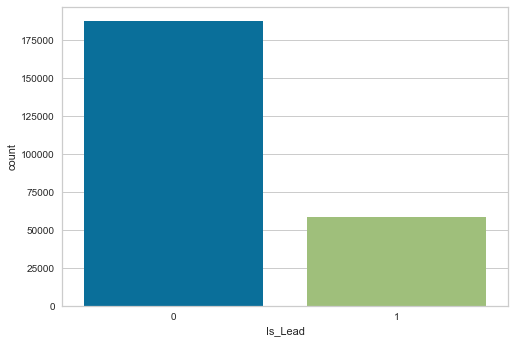

In [16]:
## Lets Check the count of Response..  and for ML model this is an Dependant variable
sns.countplot(x = 'Is_Lead', data = data_train, saturation = 0.90)

###### From above we can conclude that most of people are not interested in Credit Card

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

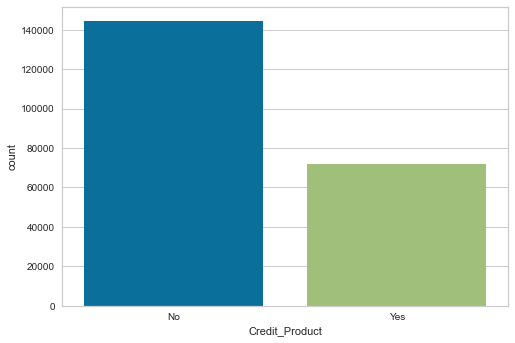

In [17]:
sns.countplot(x = 'Credit_Product', data = data_train, saturation = 0.90)

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

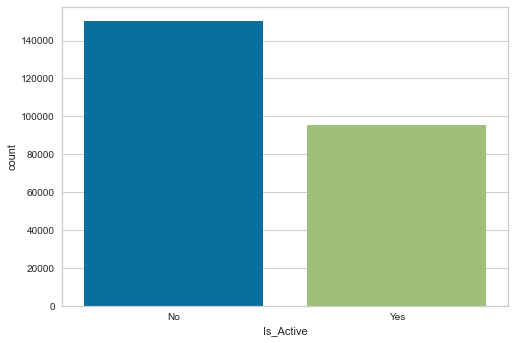

In [18]:
sns.countplot(x = 'Is_Active', data = data_train, saturation = 0.90)

<AxesSubplot:>

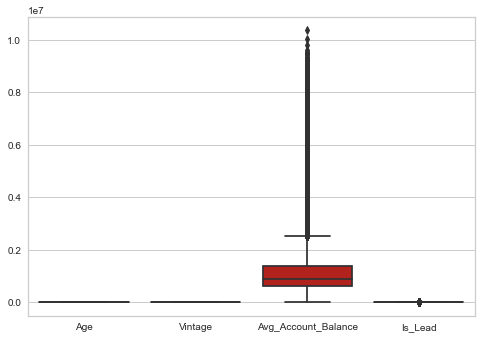

In [19]:
## Relation of All Datasets
sns.boxplot(data = data_train)

In [20]:
data_train["Gender"].value_counts() ## Checking count of Gender Column

Male      134197
Female    111528
Name: Gender, dtype: int64

In [21]:
data_train["Age"].value_counts() ## Checking count of Age Column

28    14533
29    13284
27    13005
30    11066
26     9039
      ...  
82      749
83      694
84      624
85      604
23        1
Name: Age, Length: 63, dtype: int64

In [22]:
data_train["Occupation"].value_counts() ## Checking count of Occupation Column

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

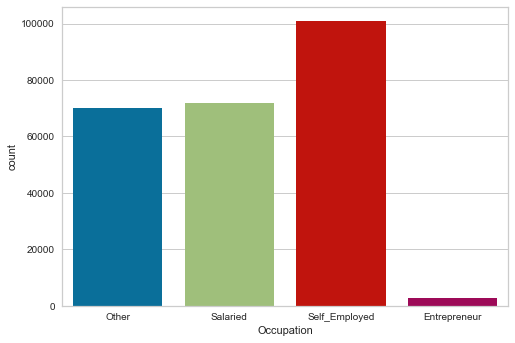

In [23]:
sns.countplot(x = 'Occupation', data = data_train, saturation = 0.90) ## Visualizing the column Occupation

In [24]:
data_train["Avg_Account_Balance"].value_counts()

4022185    127
1611273     35
4126262     33
1142030     32
936814      31
          ... 
2761945      1
3173446      1
2315477      1
3120366      1
765898       1
Name: Avg_Account_Balance, Length: 135292, dtype: int64

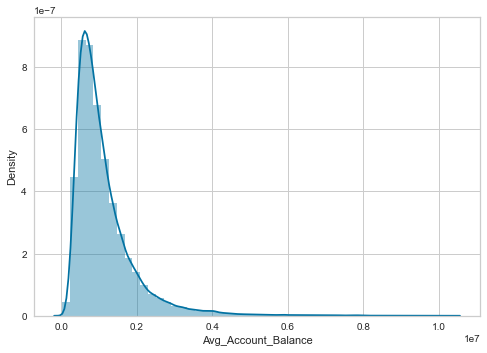

In [25]:
sns.distplot(data_train["Avg_Account_Balance"])
plt.show()

###### From above we can conclude that The Avg Account Balance is not normally distributed

In [26]:
data_train["Avg_Account_Balance"] = np.sqrt(data_train['Avg_Account_Balance']) ##Taking Log Transformation for Normal Distribution

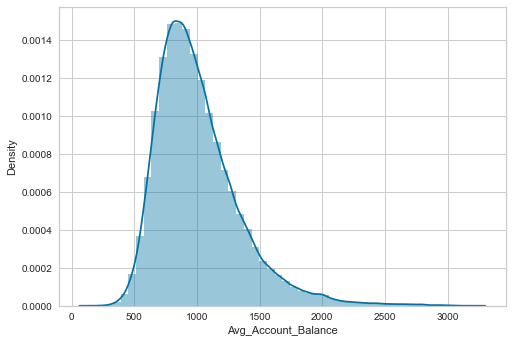

In [27]:
sns.distplot(data_train["Avg_Account_Balance"]) ## Now data is normally distributed
plt.show() 

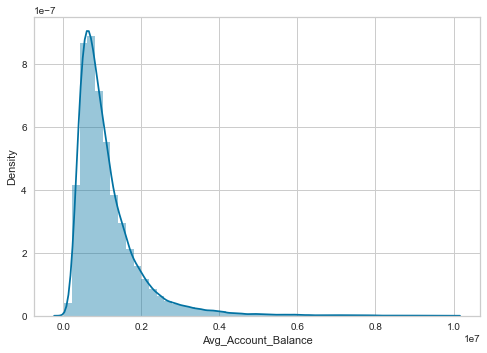

In [28]:
sns.distplot(data_test["Avg_Account_Balance"])
plt.show()

In [29]:
data_test["Avg_Account_Balance"] = np.sqrt(data_test['Avg_Account_Balance'])

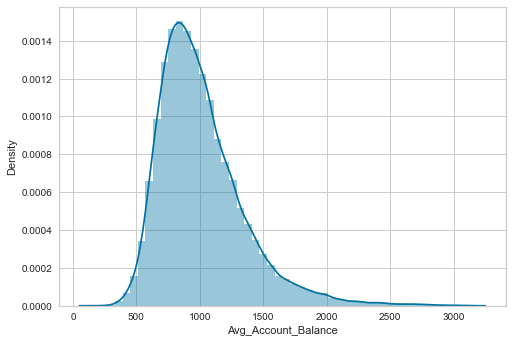

In [30]:
sns.distplot(data_test["Avg_Account_Balance"])
plt.show()

### PLOTTING THE CORRELATING MATRIX

<AxesSubplot:>

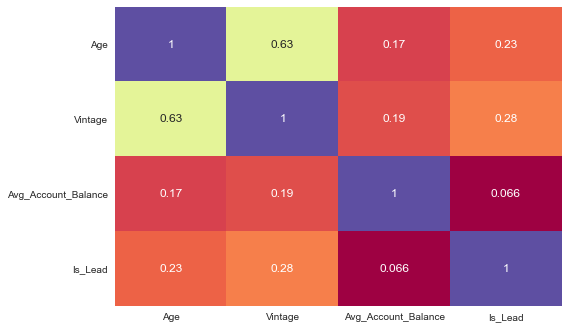

In [31]:
corr = data_train.corr()
sns.heatmap(corr, annot = True, cmap = "Spectral", cbar = False)

# 3) TRAIN TEST SPLIT

In [32]:
x_train,x_test = train_test_split(data_train, test_size = 0.2, random_state = 1) ##Splitting Train Datasets

In [33]:
x_train1 = x_train.drop(["ID","Is_Lead"],1) ## Dropping ID and Is_Lead Variable from Split Train datasets
y_train1 = x_train["Is_Lead"] ## Drop Is_Lead variable from Split Train datasets is added 

In [34]:
x_test1 = x_test.drop(['ID',"Is_Lead"],1) ## Dropping ID and Is_Lead Variable from Split Train datasets
y_test1 = x_test["Is_Lead"] ## Drop Is_Lead variable from Split Train datasets is added 

In [35]:
x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape ## Checking Shape of Split Train Datasets

((196580, 9), (196580,), (49145, 9), (49145,))

# 4) CREATING MODEL TRANSFORMER AND PIPELINE

In [36]:
num_cols = x_train1.select_dtypes(np.number).columns ##Generating Numeric col separately

In [37]:
char_cols = x_train1.select_dtypes(object).columns ##Generating Character col separately

In [38]:
num_cols, char_cols

(Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object'),
 Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
        'Is_Active'],
       dtype='object'))

In [39]:
pipe_num = make_pipeline(SimpleImputer(strategy = "median"), StandardScaler()) ## Creating Pipeline
pipe_char = make_pipeline(SimpleImputer(strategy = "constant", fill_value = "Missing"),
                          OneHotEncoder(handle_unknown = "ignore"))

In [40]:
ctrans = make_column_transformer((pipe_num, num_cols), (pipe_char, char_cols)) ## ColumnTransformer

In [41]:
ctrans.fit_transform(x_train1)

<196580x53 sparse matrix of type '<class 'numpy.float64'>'
	with 1769220 stored elements in Compressed Sparse Row format>

In [42]:
ctrans.transform(data_test)

<105312x53 sparse matrix of type '<class 'numpy.float64'>'
	with 947808 stored elements in Compressed Sparse Row format>

# 5) Machine Learning Algorithm - Logistic Regression

In [43]:
logreg = LogisticRegression(
         solver='liblinear',
         penalty='l1',
         class_weight='balanced',
         random_state=1,
         max_iter=800,)

In [44]:
logreg

LogisticRegression(class_weight='balanced', max_iter=800, penalty='l1',
                   random_state=1, solver='liblinear')

In [45]:
pipe = make_pipeline(ctrans, logreg)

In [46]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  (

In [47]:
pipe.fit(x_train1,y_train1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  (

# 5.1) PREDICTION

In [48]:
pipe.predict(x_train1)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
pipe.predict(x_test1)

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [50]:
pipe.predict_proba(x_train1)

array([[0.79753618, 0.20246382],
       [0.92258841, 0.07741159],
       [0.6305282 , 0.3694718 ],
       ...,
       [0.87403857, 0.12596143],
       [0.31207251, 0.68792749],
       [0.83642679, 0.16357321]])

# 5.2) AUC ROC CURVE

In [51]:
roc_auc_score(y_train1,pipe.predict_proba(x_train1)[:,1])

0.8589740216290964

In [52]:
roc_auc_score(y_test1,pipe.predict_proba(x_test1)[:,1]) # score model performance on the test data

0.8579802257753875

In [53]:
roc_auc_score(y_train1,pipe.predict_proba(x_train)[:,1])

0.8589740216290964

In [54]:
roc_auc_score(y_test1,pipe.predict_proba(x_test)[:,1])

0.8579802257753875

# 6) CROSS VALIDATION SCORE

In [55]:
cross_val_score(pipe, x_train1, y_train1, scoring="accuracy")

array([0.80753383, 0.80552447, 0.80333706, 0.80130227, 0.80491403])

# 7) GRID SEARCH CV USING PIPELINE 

In [58]:
params = {} 
params["logisticregression__penalty"] = ["l1","l2"]
params["logisticregression__C"] = [0.1, 0.01, 1, 10]

In [59]:
params ## parameters are learned by model, hyperparameters are set by user and selected using grid search
## or random grid search

{'logisticregression__penalty': ['l1', 'l2'],
 'logisticregression__C': [0.1, 0.01, 1, 10]}

In [60]:
logreg = LogisticRegression(solver="liblinear",random_state=1)
new_pipe = make_pipeline(ctrans, logreg)

In [61]:
new_pipe

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                           

In [62]:
grid = GridSearchCV(new_pipe, params, cv=5, scoring = "accuracy")

In [63]:
grid

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
  

In [64]:
grid.fit(x_train1, y_train1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
  

In [68]:
# Prediction
grid.predict(x_train1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
grid.predict(x_test1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
grid.predict_proba(x_train1)

array([[0.92400789, 0.07599211],
       [0.97519806, 0.02480194],
       [0.84537113, 0.15462887],
       ...,
       [0.95571685, 0.04428315],
       [0.58583368, 0.41416632],
       [0.9426005 , 0.0573995 ]])

In [71]:
# AUC ROC SCORE 
roc_auc_score(y_train1,grid.predict_proba(x_train1)[:,1]) 

0.8585860279535937

In [72]:
roc_auc_score(y_test1,grid.predict_proba(x_test)[:,1]) 

0.8577124698481753

In [73]:
grid.best_params_

{'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}

In [74]:
pipe.named_steps.logisticregression.C = 10

In [75]:
pipe.named_steps.logisticregression.penalty = "l2"

In [76]:
pipe.fit(x_train1,y_train1)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                           

In [77]:
pipe.predict(x_train1)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [78]:
## AUC ROC SCORE
roc_auc_score(y_train1,pipe.predict_proba(x_train1)[:,1])

0.8589652754903325

In [79]:
roc_auc_score(y_test1,pipe.predict_proba(x_test1)[:,1])

0.8579694164838698

In [80]:
pipe.predict(data_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# 8) FEATURE IMPORTANCE

In [81]:
onehotcols =  ctrans.named_transformers_['pipeline-2']['onehotencoder'].get_feature_names()

In [82]:
onehotcols

array(['x0_Female', 'x0_Male', 'x1_RG250', 'x1_RG251', 'x1_RG252',
       'x1_RG253', 'x1_RG254', 'x1_RG255', 'x1_RG256', 'x1_RG257',
       'x1_RG258', 'x1_RG259', 'x1_RG260', 'x1_RG261', 'x1_RG262',
       'x1_RG263', 'x1_RG264', 'x1_RG265', 'x1_RG266', 'x1_RG267',
       'x1_RG268', 'x1_RG269', 'x1_RG270', 'x1_RG271', 'x1_RG272',
       'x1_RG273', 'x1_RG274', 'x1_RG275', 'x1_RG276', 'x1_RG277',
       'x1_RG278', 'x1_RG279', 'x1_RG280', 'x1_RG281', 'x1_RG282',
       'x1_RG283', 'x1_RG284', 'x2_Entrepreneur', 'x2_Other',
       'x2_Salaried', 'x2_Self_Employed', 'x3_X1', 'x3_X2', 'x3_X3',
       'x3_X4', 'x4_Missing', 'x4_No', 'x4_Yes', 'x5_No', 'x5_Yes'],
      dtype=object)

In [83]:
all_columns = list(num_cols) + list(onehotcols)    

In [84]:
all_columns

['Age',
 'Vintage',
 'Avg_Account_Balance',
 'x0_Female',
 'x0_Male',
 'x1_RG250',
 'x1_RG251',
 'x1_RG252',
 'x1_RG253',
 'x1_RG254',
 'x1_RG255',
 'x1_RG256',
 'x1_RG257',
 'x1_RG258',
 'x1_RG259',
 'x1_RG260',
 'x1_RG261',
 'x1_RG262',
 'x1_RG263',
 'x1_RG264',
 'x1_RG265',
 'x1_RG266',
 'x1_RG267',
 'x1_RG268',
 'x1_RG269',
 'x1_RG270',
 'x1_RG271',
 'x1_RG272',
 'x1_RG273',
 'x1_RG274',
 'x1_RG275',
 'x1_RG276',
 'x1_RG277',
 'x1_RG278',
 'x1_RG279',
 'x1_RG280',
 'x1_RG281',
 'x1_RG282',
 'x1_RG283',
 'x1_RG284',
 'x2_Entrepreneur',
 'x2_Other',
 'x2_Salaried',
 'x2_Self_Employed',
 'x3_X1',
 'x3_X2',
 'x3_X3',
 'x3_X4',
 'x4_Missing',
 'x4_No',
 'x4_Yes',
 'x5_No',
 'x5_Yes']

In [85]:
eli5.explain_weights(
    pipe.named_steps["logisticregression"], top=100, feature_names=all_columns
)

Weight?,Feature
+2.216,x4_Missing
+0.509,x2_Salaried
+0.416,x2_Entrepreneur
+0.347,x3_X2
+0.309,Vintage
+0.269,x5_Yes
+0.257,<BIAS>
+0.217,x3_X4
+0.212,x3_X3
+0.175,x1_RG269


# 9) PLOTS

### ROC PLOTS

In [86]:
train_pred = pipe.predict_proba(x_train)
test_pred = pipe.predict_proba(x_test)

In [87]:
fpr, tpr, _ = roc_curve(y_test1, test_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)

fpr_tr, tpr_tr, thresholds_roc = roc_curve(y_train1, train_pred[:, 1])
roc_auc_tr = metrics.auc(fpr_tr, tpr_tr)

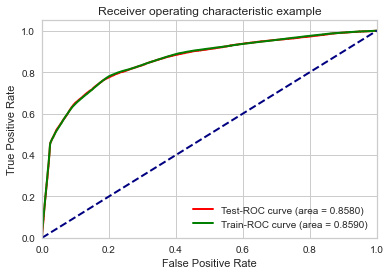

In [88]:
plt.plot(fpr, tpr, color="red", lw=2, label="Test-ROC curve (area = %0.4f)" % roc_auc)
plt.plot(
    fpr_tr,
    tpr_tr,
    color="green",
    lw=2,
    label="Train-ROC curve (area = %0.4f)" % roc_auc_tr,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Precision Recall Curve

In [89]:
precision, recall, thresholds = precision_recall_curve(y_test1, test_pred[:, 1])

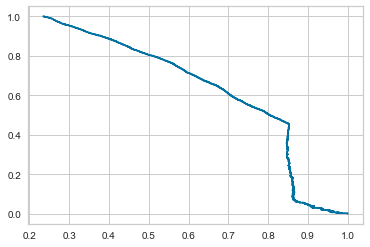

In [90]:
plt.plot(precision, recall)

In [91]:
target_names = y_test1.unique().astype(str)
y_pred = grid.predict(x_test1)
print(classification_report(y_test1, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     37615
           1       0.82      0.49      0.61     11530

    accuracy                           0.85     49145
   macro avg       0.84      0.73      0.76     49145
weighted avg       0.85      0.85      0.84     49145



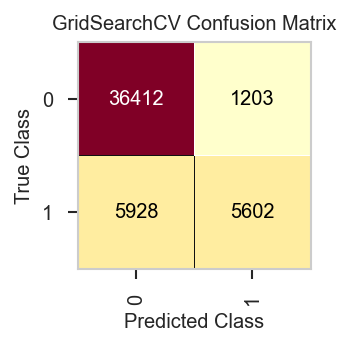

In [92]:
with sns.plotting_context("paper"):
    fig, ax = plt.subplots(figsize=(2, 2), dpi=150)
    cm_viz = classifier.ConfusionMatrix(grid, percent=False)
    cm_viz.fit(x_train1, y_train1)
    cm_viz.score(x_test1, y_test1)
    cm_viz.poof()

# 10) SUBMISSION

In [93]:
submission = pipe.predict(data_test)

In [94]:
submission = pd.DataFrame(data = submission)

In [95]:
submission.columns = ["Is_Lead"]

In [96]:
submission["ID"] = data_test.ID

In [97]:
submission = submission[["ID", "Is_Lead"]]

In [98]:
submission.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [99]:
data_test.shape,submission.shape

((105312, 10), (105312, 2))

In [100]:
submission =submission.to_csv("Abdeali_JobHackthon_LogisticRegression.csv",index=False)